In [3]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.transform import resize

Using TensorFlow backend.


In [4]:
def load_photos(directory):
    images = []
    labels = []
    for name in listdir(directory):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(128, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value = int(name.split('_')[0])
        labels.append(value)
        images.append(image)
    return images, labels

In [5]:
# load images from both train and test groups
directory = '../data/Dataset-1x3/Train'
images, labels = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)
directory = '../data/Dataset-1x3/Val'
images_val, labels_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

Loaded Images and labels for training: 1209
Loaded Images and labels for validation: 134


In [6]:
#normalise datas
images = np.array(images)
images = images[:, 50:, :, :]
images /= 255
images_val = np.array(images_val)
images_val = images_val[:, 50:, :, :]
images_val /= 255

((1209, 78, 160, 3), <matplotlib.image.AxesImage at 0x2a40dceb6d8>)

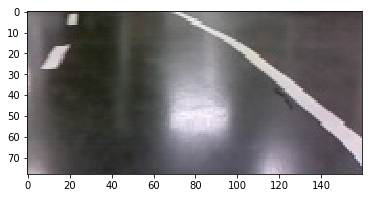

In [7]:
images.shape, plt.imshow(images[180])

In [8]:
#convert labels to np.array
labels = np.array(labels)
labels_val = np.array(labels_val)

In [9]:
#convert datas to dummyvalues
labelsd = pd.get_dummies(labels)

In [10]:
labelsd.shape, labelsd

((1209, 3),       0  1  2
 0     1  0  0
 1     1  0  0
 2     1  0  0
 3     1  0  0
 4     1  0  0
 5     1  0  0
 6     1  0  0
 7     1  0  0
 8     1  0  0
 9     1  0  0
 10    1  0  0
 11    1  0  0
 12    1  0  0
 13    1  0  0
 14    1  0  0
 15    1  0  0
 16    1  0  0
 17    1  0  0
 18    1  0  0
 19    1  0  0
 20    1  0  0
 21    1  0  0
 22    1  0  0
 23    1  0  0
 24    1  0  0
 25    1  0  0
 26    1  0  0
 27    1  0  0
 28    1  0  0
 29    1  0  0
 ...  .. .. ..
 1179  0  0  1
 1180  0  0  1
 1181  0  0  1
 1182  0  0  1
 1183  0  0  1
 1184  0  0  1
 1185  0  0  1
 1186  0  0  1
 1187  0  0  1
 1188  0  0  1
 1189  0  0  1
 1190  0  0  1
 1191  0  0  1
 1192  0  0  1
 1193  0  0  1
 1194  0  0  1
 1195  0  0  1
 1196  0  0  1
 1197  0  0  1
 1198  0  0  1
 1199  0  0  1
 1200  0  0  1
 1201  0  0  1
 1202  0  0  1
 1203  0  0  1
 1204  0  0  1
 1205  0  0  1
 1206  0  0  1
 1207  0  0  1
 1208  0  0  1
 
 [1209 rows x 3 columns])

In [11]:
#convert to np.array again
labelsd = np.array(labelsd)

In [12]:
#check if OK
labels[1], labelsd[1]

(0, array([1, 0, 0], dtype=uint8))

In [13]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers

In [14]:
K.clear_session()

img_in = Input(shape=(78, 160, 3), name='img_in')

x = img_in

x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2))(x)

flat = Flatten()(x)

x = Dense(20)(flat)
x = Activation('relu')(x)

#categorical output
out = Dense(3, activation='softmax')(x)

model = Model(inputs=[img_in], outputs=[out])
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 78, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 78, 160, 1)        28        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 80, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 80, 2)         20        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 40, 2)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 40, 2)         38        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 20, 2)          0         
__________

In [21]:
h = model.fit(images, labelsd, batch_size=1, epochs=5, verbose=1)

Epoch 1/5
1209/1209 [==============================] - 8s - loss: 0.0292 - acc: 0.9917     
Epoch 2/5
1209/1209 [==============================] - 8s - loss: 0.0249 - acc: 0.9909     
Epoch 3/5
1209/1209 [==============================] - 8s - loss: 0.0275 - acc: 0.9926     - ETA: 1
Epoch 4/5
1209/1209 [==============================] - 8s - loss: 0.0229 - acc: 0.9934     
Epoch 5/5
1209/1209 [==============================] - 9s - loss: 0.0209 - acc: 0.9942     


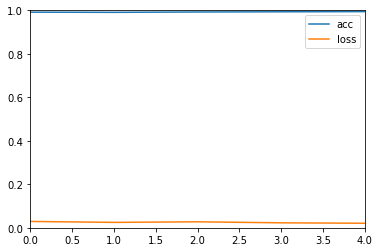

In [22]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

In [27]:
# Get predictions
all_preds = model.predict(images_val)

# Check predictions
idx = np.argmax(all_preds, axis=1)

i = 0
for value in idx:
    idx[i] = value
    i = i + 1

idx, labels_val

(array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [24]:
import math
i = 0
res = 0
for value in idx:
    if value != labels_val[i]:
        res = res + 1
    i = i + 1
res/i

0.11194029850746269

In [25]:
model.save('model-1x3-simpler.h5')

In [ ]:
from keras.models import load_model
model = load_model('test_model.h5')